In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
combined_data = pd.read_csv('data/combined_data/cleaned_data.csv')

In [3]:
combined_data.head()

,T,TM,Tm,H,PP,VV,V,VM,PM_2_5
0,23.4,30.3,19.0,59.0,0.0,6.3,4.3,5.4,284.795833
1,22.4,30.3,16.9,57.0,0.0,6.9,3.3,7.6,239.695455
2,24.0,31.8,16.9,51.0,0.0,6.9,2.8,5.4,182.187500
3,22.8,30.2,17.6,55.0,0.0,7.7,3.7,7.6,264.064286
4,23.1,30.6,17.4,46.0,0.0,6.9,3.3,5.4,223.208333


In [4]:
X = combined_data.iloc[:, :-1]
y = combined_data.iloc[:, -1]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

## KNN REGRESSOR

In [7]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [8]:
f'Coefficient of determination R^2 on train set {knn.score(X_train, y_train)}'
# must be close to 1, 1 is perfect fit

'Coefficient of determination R^2 on train set 1.0'

In [9]:
f'Coefficient of determination R^2 on test set {knn.score(X_test, y_test)}'

'Coefficient of determination R^2 on test set -0.22834271149916693'

In [10]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, y, cv = 3)

In [11]:
score.mean()

-0.09121259776941071

In [13]:
pred = knn.predict(X_test)

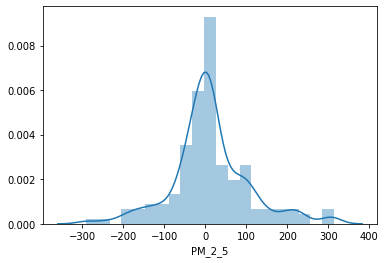

In [14]:
sns.distplot(y_test - pred)

#### HYPERPARAMETER TUNING

In [15]:
scores = []
for i in range(1, 40):
    knn = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(knn, X, y, cv=5, scoring="neg_mean_squared_error")
    scores.append(score.mean())

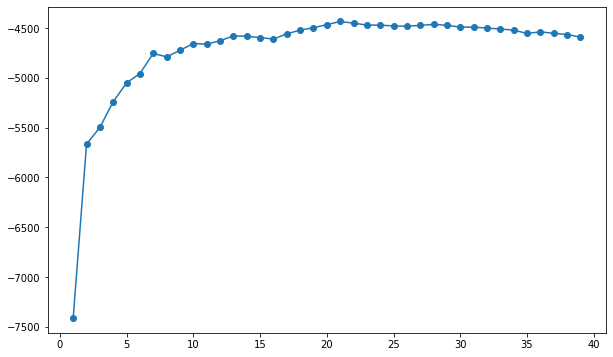

In [27]:
plt.figure(figsize=(10,6))
plt.plot(range(1, 40), scores, marker='o')

In [30]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                    weights='uniform')

In [33]:
cross_val_score(knn, X, y, cv = 3).mean()

0.29076617975303

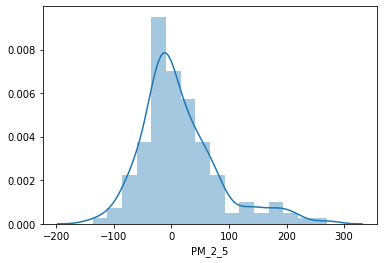

In [31]:
pred = knn.predict(X_test)
sns.distplot(y_test-pred)

In [32]:
from sklearn import metrics
print(f"Mean Abs Error: {metrics.mean_absolute_error(y_test, pred)}")
print(f"Mean Sq Error: {metrics.mean_squared_error(y_test, pred)}")
print(f"Root Mean Error: {np.sqrt(metrics.mean_squared_error(y_test, pred))}")

Mean Abs Error: 49.13629502719656
Mean Sq Error: 4889.740927577245
Root Mean Error: 69.92668251516902


In [35]:
import pickle
pickle.dump(knn, open('knn.pkl', 'wb'))